In [1]:
import numpy as np
import pandas as pd
import joblib
import warnings
import gc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# 加载数据
use_cols = joblib.load('./use_cols')

In [7]:
def load_test(test_no=1, use_cols=[]):
    input_dir = '../../2.2preprocess_test_data/concats_more/'
    test = joblib.load(input_dir+'concat_0%d.lz4'%test_no) 
    x_test = test[use_cols]
    return x_test

x_test_01 = load_test(1, use_cols)
x_test_02 = load_test(2, use_cols)
x_test_03 = load_test(3, use_cols)
x_test_04 = load_test(4, use_cols)
x_test_05 = load_test(5, use_cols)

In [8]:
# 标准化
def standard_scale_new(data,scaler):
    cols = data.columns
    idx = data.index
    data_s = scaler.transform(data.values)
    return pd.DataFrame(data=data_s,columns=cols,index=idx)

scaler = joblib.load('./scaler')

In [9]:
# 查看PCA_T2
def cal_T2(data,pca):
    T2=[]
    projected_data = pca.transform(data)
    eigenvalue_matrix = np.mat(np.diag(pca.singular_values_ ))
    for x in projected_data:
        tmp = np.mat(x)*np.linalg.inv(eigenvalue_matrix)*np.mat(x).T
        T2.append(tmp[0,0])
    return T2

def plot_data(data_stand, pca):
    T2 = cal_T2(data_stand,pca)
    T2 = pd.DataFrame(data=T2,columns=['T2'], index=data_stand.index)
#     plt.figure(figsize=(10,8))
#     T2.plot()
    T2_ewm = T2.ewm(alpha=0.4).mean()
#     T2_ewm.plot()
    return T2,T2_ewm

def box_filter(x):
    '''
    描述：
        箱线图去异常值，x为array
    '''
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x,75)
    iqr = q3 - q1
    low_bound = q1 - 1.5*iqr
    up_bound = q3 + 1.5*iqr
    x[x<low_bound] = low_bound
    x[x>up_bound] = up_bound
    return x 

pca = joblib.load('./model/pca_1XX')

In [10]:
data_stand_01 = standard_scale_new(x_test_01,scaler)
T2_01,T2_ewm_01 = plot_data(data_stand_01, pca)

data_stand_02 = standard_scale_new(x_test_02,scaler)
T2_02,T2_ewm_02 = plot_data(data_stand_02, pca)

data_stand_03 = standard_scale_new(x_test_03,scaler)
T2_03,T2_ewm_03 = plot_data(data_stand_03, pca)

data_stand_04 = standard_scale_new(x_test_04,scaler)
T2_04,T2_ewm_04 = plot_data(data_stand_04, pca)

data_stand_05 = standard_scale_new(x_test_05,scaler)
T2_05,T2_ewm_05 = plot_data(data_stand_05, pca)

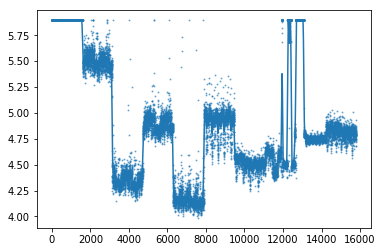

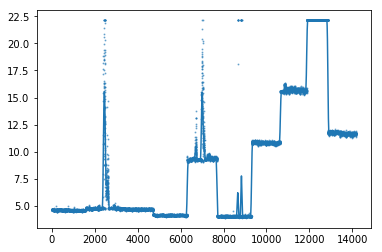

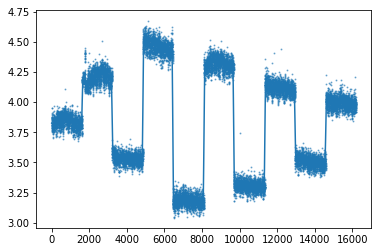

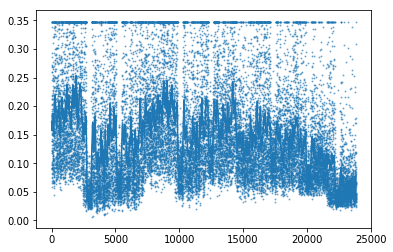

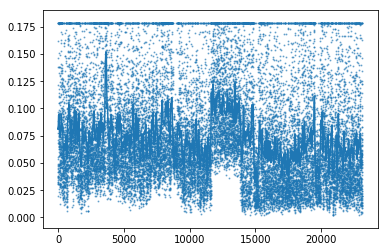

In [11]:
plt.figure()
T2_ad = box_filter(T2_01.values.ravel())
plt.scatter(range(len(T2_01)),T2_01, s=1, alpha=0.5)
# plt.scatter(range(len(T2_ad)),T2_ad, s=1, alpha=0.5)
T2_ad_rolled = pd.Series(T2_ad).rolling(window=100, min_periods=1, center=True, win_type ='triang').mean()
T2_ad_rolled.plot()

plt.figure()
T2_ad = box_filter(T2_02.values.ravel())
plt.scatter(range(len(T2_02)),T2_02, s=1, alpha=0.5)
# plt.scatter(range(len(T2_ad)),T2_ad, s=1, alpha=0.5)
T2_ad_rolled = pd.Series(T2_ad).rolling(window=100, min_periods=1, center=True, win_type ='triang').mean()
T2_ad_rolled.plot()

plt.figure()
T2_ad = box_filter(T2_03.values.ravel())
plt.scatter(range(len(T2_03)),T2_03, s=1, alpha=0.5)
# plt.scatter(range(len(T2_ad)),T2_ad, s=1, alpha=0.5)
T2_ad_rolled = pd.Series(T2_ad).rolling(window=100, min_periods=1, center=True, win_type ='triang').mean()
T2_ad_rolled.plot()

plt.figure()
T2_ad = box_filter(T2_04.values.ravel())
plt.scatter(range(len(T2_04)),T2_04, s=1, alpha=0.5)
# plt.scatter(range(len(T2_ad)),T2_ad, s=1, alpha=0.5)
T2_ad_rolled = pd.Series(T2_ad).rolling(window=100, min_periods=1, center=True, win_type ='triang').mean()
T2_ad_rolled.plot()

plt.figure()
T2_ad = box_filter(T2_05.values.ravel())
plt.scatter(range(len(T2_05)),T2_05, s=1, alpha=0.5)
# plt.scatter(range(len(T2_ad)),T2_ad, s=1, alpha=0.5)
T2_ad_rolled = pd.Series(T2_ad).rolling(window=100, min_periods=1, center=True, win_type ='triang').mean()
T2_ad_rolled.plot()

In [29]:
# good：,4,5